# Implementation of Stochastic and Batch gradient descent in Python

In [71]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [7]:
df = pd.read_csv('homeprices_bangalor.csv')
df.sample(5)

,area,bedrooms,price
8,1310,3,50.0
10,1800,3,82.0
2,1440,3,62.0
14,2250,3,101.0
7,3300,4,155.0


### Load dataset in pandas dataframe

In [62]:
# preprocess / scaling
# set up scalers
x_scaler = preprocessing.MinMaxScaler((0, 1))
y_scaler = preprocessing.MinMaxScaler((0, 1))

scaled_x = x_scaler.fit_transform(df.drop('price', axis=1))
scaled_y = y_scaler.fit_transform(df['price'].values.reshape(df.shape[0],1))

## Batch Gradient Descent

In [63]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):

    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + bias

        w_d = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        bias_d = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_d
        bias = bias - learning_rate * bias_d

        cost = np.mean(np.square(y_true - y_predicted))

        if(i%10 == 0):
            cost_list.append(cost)
            epoch_list.append(i)
    return w, bias, cost,cost_list, epoch_list



In [64]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0]),500)

print(w,b,cost)

[0.70712464 0.67456527] -0.23034857438407427 0.0068641890429808105


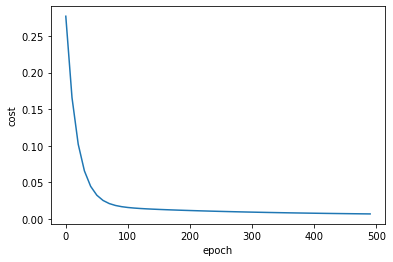

In [65]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [70]:
def predict(area, bedrooms, w, b):
    scaled_X = x_scaler.transform([[area, bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return y_scaler.inverse_transform([[scaled_price]])[0][0]
 

predict(2600, 4, w, b)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

## Stochastic Gradient Descent

Stochastic gradient descent will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [82]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        # get random index from X -- stochastic
        random_index = random.randint(0, total_samples-1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_X.T) + bias

        w_d = -(2/total_samples)*(sample_X.T.dot(sample_y-y_predicted))
        bias_d = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_d
        bias = bias - learning_rate * bias_d

        cost = np.mean(np.square(sample_y - y_predicted))

        if(i % 100 == 0):
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


In [85]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    10000
)

w_sgd, b_sgd, cost_sgd

(array([0.70412055, 0.67515917]), -0.23034857438407427, 0.0026653731661384255)

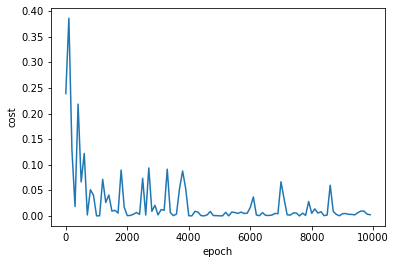

In [86]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)